# Лабораторная работа 3. Итеративные и рекурсивные алгоритмы

### Вариант: **13**

## Задание 1.

#### Реализация
*Реализуйте рекурсивный алгоритм, распечатывающий различные представления заданного натурального числа $N$ в виде суммы не менее двух натуральных слагаемых. Представления, отличающиеся лишь порядком слагаемых, различными не считаются.*

In [1]:
def print_sum_decompositions_recursively(n, start=1, path=None):
    if path is None:
        path = []
    
    if n == 0:  # если сумма пути достигла цели
        if len(path) > 1:  # если получилось больше одного слагаемого
            print(' + '.join(str(i) for i in path))
        return
    
    for i in range(start, n+1):
        # рекурсивно вызываем функцию
        print_sum_decompositions_recursively(n-i, i, path+[i])


In [3]:
print_sum_decompositions_recursively(5)

1 + 1 + 1 + 1 + 1
1 + 1 + 1 + 2
1 + 1 + 3
1 + 2 + 2
1 + 4
2 + 3


#### Блок-схема
**Задание 3.1.** *Составьте блок-схему;*

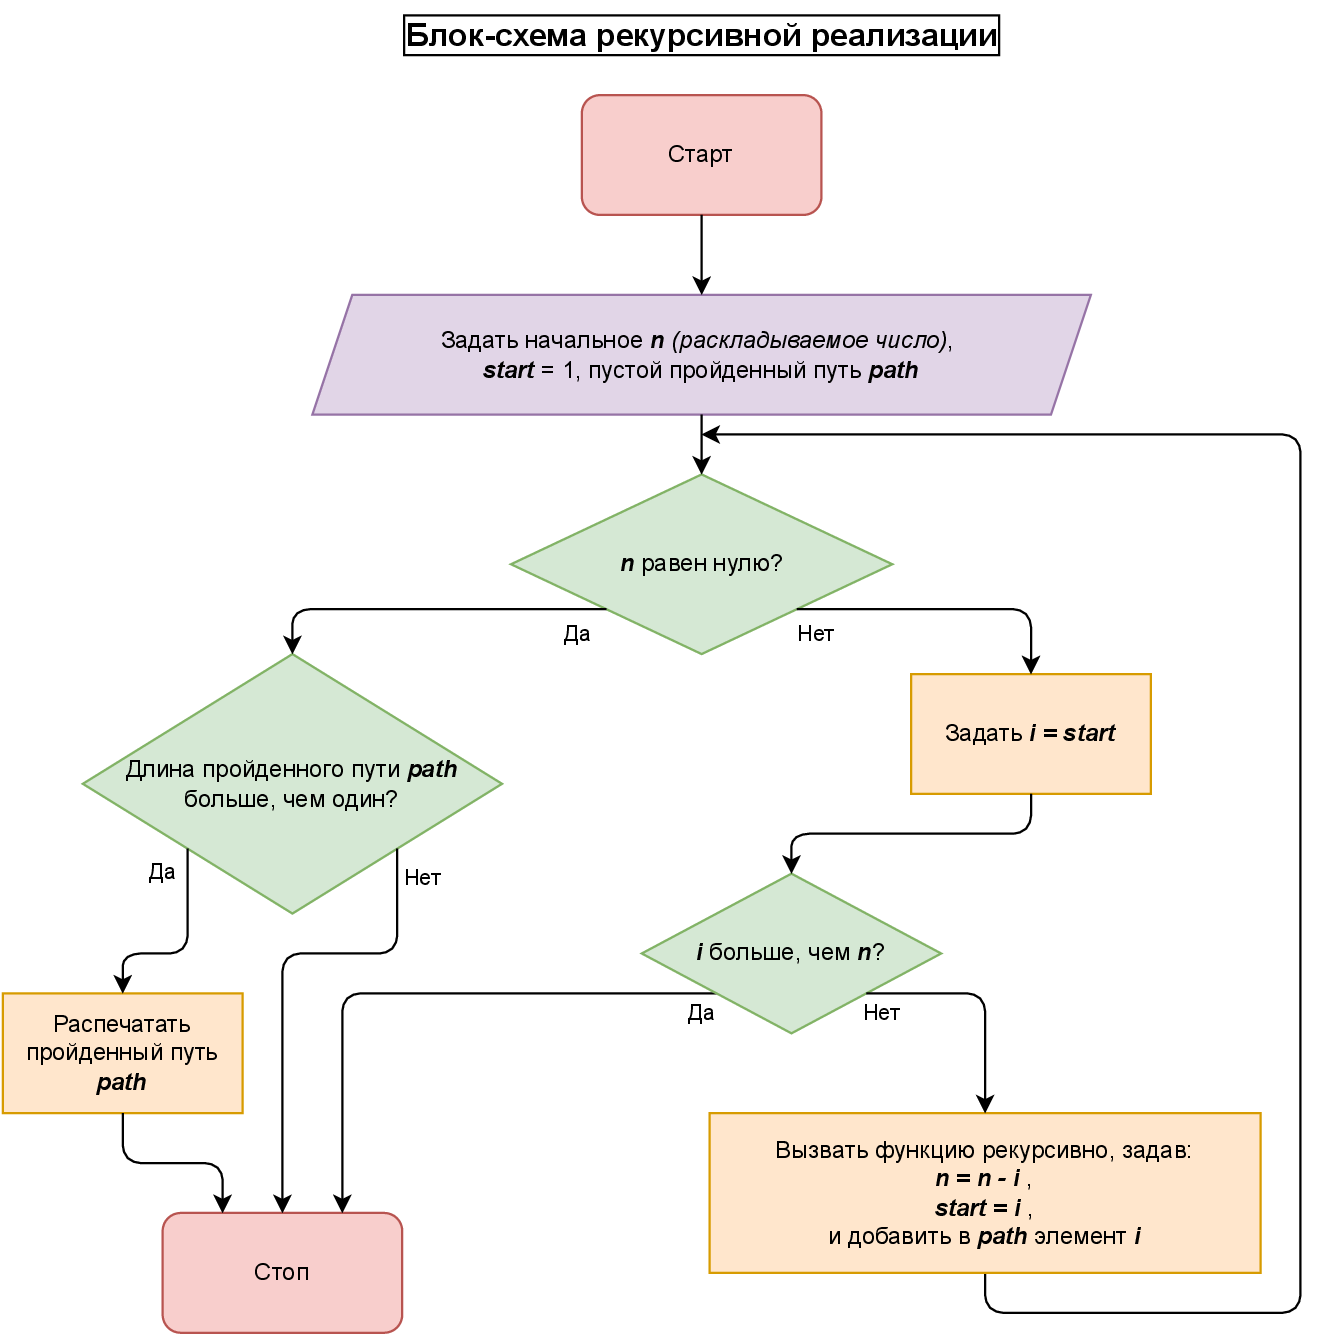

In [73]:
from wand.image import Image as WImage
blockscheme = WImage(filename='img/recursive_blockscheme.pdf',
                     resolution=200)
blockscheme

#### Оценка
**Задание 3.2.** *Оцените верхнюю границу размерности задачи, для которой при рекурсивной реализации не происходит переполнение стека вызовов;*

**Стек вызовов** — LIFO-стек, хранящий информацию для возврата управления из подфункции обратно в вызвавшую ее функцию. То есть это конечная область памяти, которая рано или поздно закончится при неограниченном увеличении количества рекурсивных вызовов функции.

**Глубиной рекурсии** называется количество последовательных вызовов "себя" без возврата значения.

Изменив функцию следующим образом, видим, что глубина равна количеству элементов $n$.

In [2]:
def print_sum_decompositions_recursively_level(n, start=1, path=None, level=0):
    if path is None:
        path = []
    
    if n == 0:  # если сумма пути достигла цели
        if len(path) > 1:  # если получилось больше одного слагаемого
            print(' + '.join(str(i) for i in path), "| Глубина:", level)
        return
    
    for i in range(start, n+1):
        # рекурсивно вызываем функцию
        print_sum_decompositions_recursively_level(n-i, i, path+[i], level=level+1)


In [3]:
print_sum_decompositions_recursively_level(5)

1 + 1 + 1 + 1 + 1 | Глубина: 5
1 + 1 + 1 + 2 | Глубина: 4
1 + 1 + 3 | Глубина: 3
1 + 2 + 2 | Глубина: 3
1 + 4 | Глубина: 2
2 + 3 | Глубина: 2


В Jupyter Notebook установлены дополнительные ограничения используемых ресурсов.

Поэтому дальнейшие пробные запуски проводились напрямую в интерпретаторе через PyCharm.

Данный алгоритм удобен тем, что первое же разложение числа в сумму слагаемых требует максимальной глубины рекурсии. Это значит, что если алгоритм начал печатать разложения, то он не достиг (и не достигнет) ограничения, которое по умолчанию в Python установлено на 1000 вызовов.

На практике получилось запустить алгоритм для разложения числа $n$ = 994. Это объясняется необходимостью вызывать и другие функции кроме рекурсивной. 

Например, такая ошибка получается при попытке запустить алгоритм при $n$ = 995:
```
    print(' + '.join(str(i) for i in path), "|", level)
                     ^^^^^^
RecursionError: maximum recursion depth exceeded while getting the str of an object
```


#### Модернизация (мемоизация)
**Задание 3.3.** *Модернизируйте рекурсивную реализацию так, чтобы сохранялись промежуточные результаты вызова рекурсии (реализуйте подобный механизм вручную, а также, с помощью декоратора @memoized);*

In [60]:
# Функция-декоратор
def memoize(f):
    cache = {}
    def wrapper(*args):
        if args in cache:
            return cache[args]
        else:
            cache[args] = f(*args)
            return cache[args]
    return wrapper

# Еще одна версия рекурсивной функции. Без вывода результата.
def print_sum_decompositions_recursively_hidden(n, start=1, path=()):
    if n == 0:  # если сумма пути достигла цели
        if len(path) > 1:  # если получилось больше одного слагаемого
            # print(' + '.join(str(i) for i in path))
            pass
        return
    
    for i in range(start, n+1):
        # рекурсивно вызываем функцию
        print_sum_decompositions_recursively_hidden(n-i, i, (*path, i))

# Декорируем функцию (Перезапуск этой ячейки очищает кеш)
print_sum_decompositions_recursively_mod = memoize(print_sum_decompositions_recursively_hidden)

In [61]:
%time print_sum_decompositions_recursively_mod(50)

CPU times: total: 250 ms
Wall time: 246 ms


In [62]:
%time print_sum_decompositions_recursively_hidden(50)

CPU times: total: 250 ms
Wall time: 247 ms


Из-за того, что в данном алгоритме рекурсивная функция каждый раз вызывается с новыми аргументами, прироста производительности не наблюдается.

Но если попробовать запустить еще раз, получаем:

In [63]:
%time print_sum_decompositions_recursively_mod(50)

CPU times: total: 0 ns
Wall time: 0 ns


In [64]:
%time print_sum_decompositions_recursively_hidden(50)

CPU times: total: 250 ms
Wall time: 250 ms


Теперь разница очевидна, результат выполнения сохранен в *"cache"* и моментально достается из памяти.

## Задание 2

#### Реализация
*Реализуйте алгоритм из **Задания 1**, не используя рекурсию.*

In [110]:
def print_sum_decompositions_iteratively(n, reverse=False):
    stack = [(n, 1, [])]
    results = []
    
    while stack:  # пока стек не пустой
        # берем "задачу" из вершины стека
        num, start, path = stack.pop()
        
        if num == 0:  # если сумма пути достигла цели
            if len(path) > 1:  # если получилось больше одного слагаемого
                results.append(path)  # записываем этот путь как итоговый
        else:
            for i in range(start, num+1):
                # добавляем "задачу" в вершину стека
                stack.append((num-i, i, path+[i]))
    
    #                     |--[  False => -1  &  True => +1  ]--|
    for path in results[::(int(reverse) - abs(1 - int(reverse)))]:
        # распечатываем итоговые пути
        print(' + '.join(str(i) for i in path))


In [111]:
print_sum_decompositions_iteratively(5)

1 + 1 + 1 + 1 + 1
1 + 1 + 1 + 2
1 + 1 + 3
1 + 2 + 2
1 + 4
2 + 3


#### Блок-схема
**Задание 3.1.** *Составьте блок-схему;*

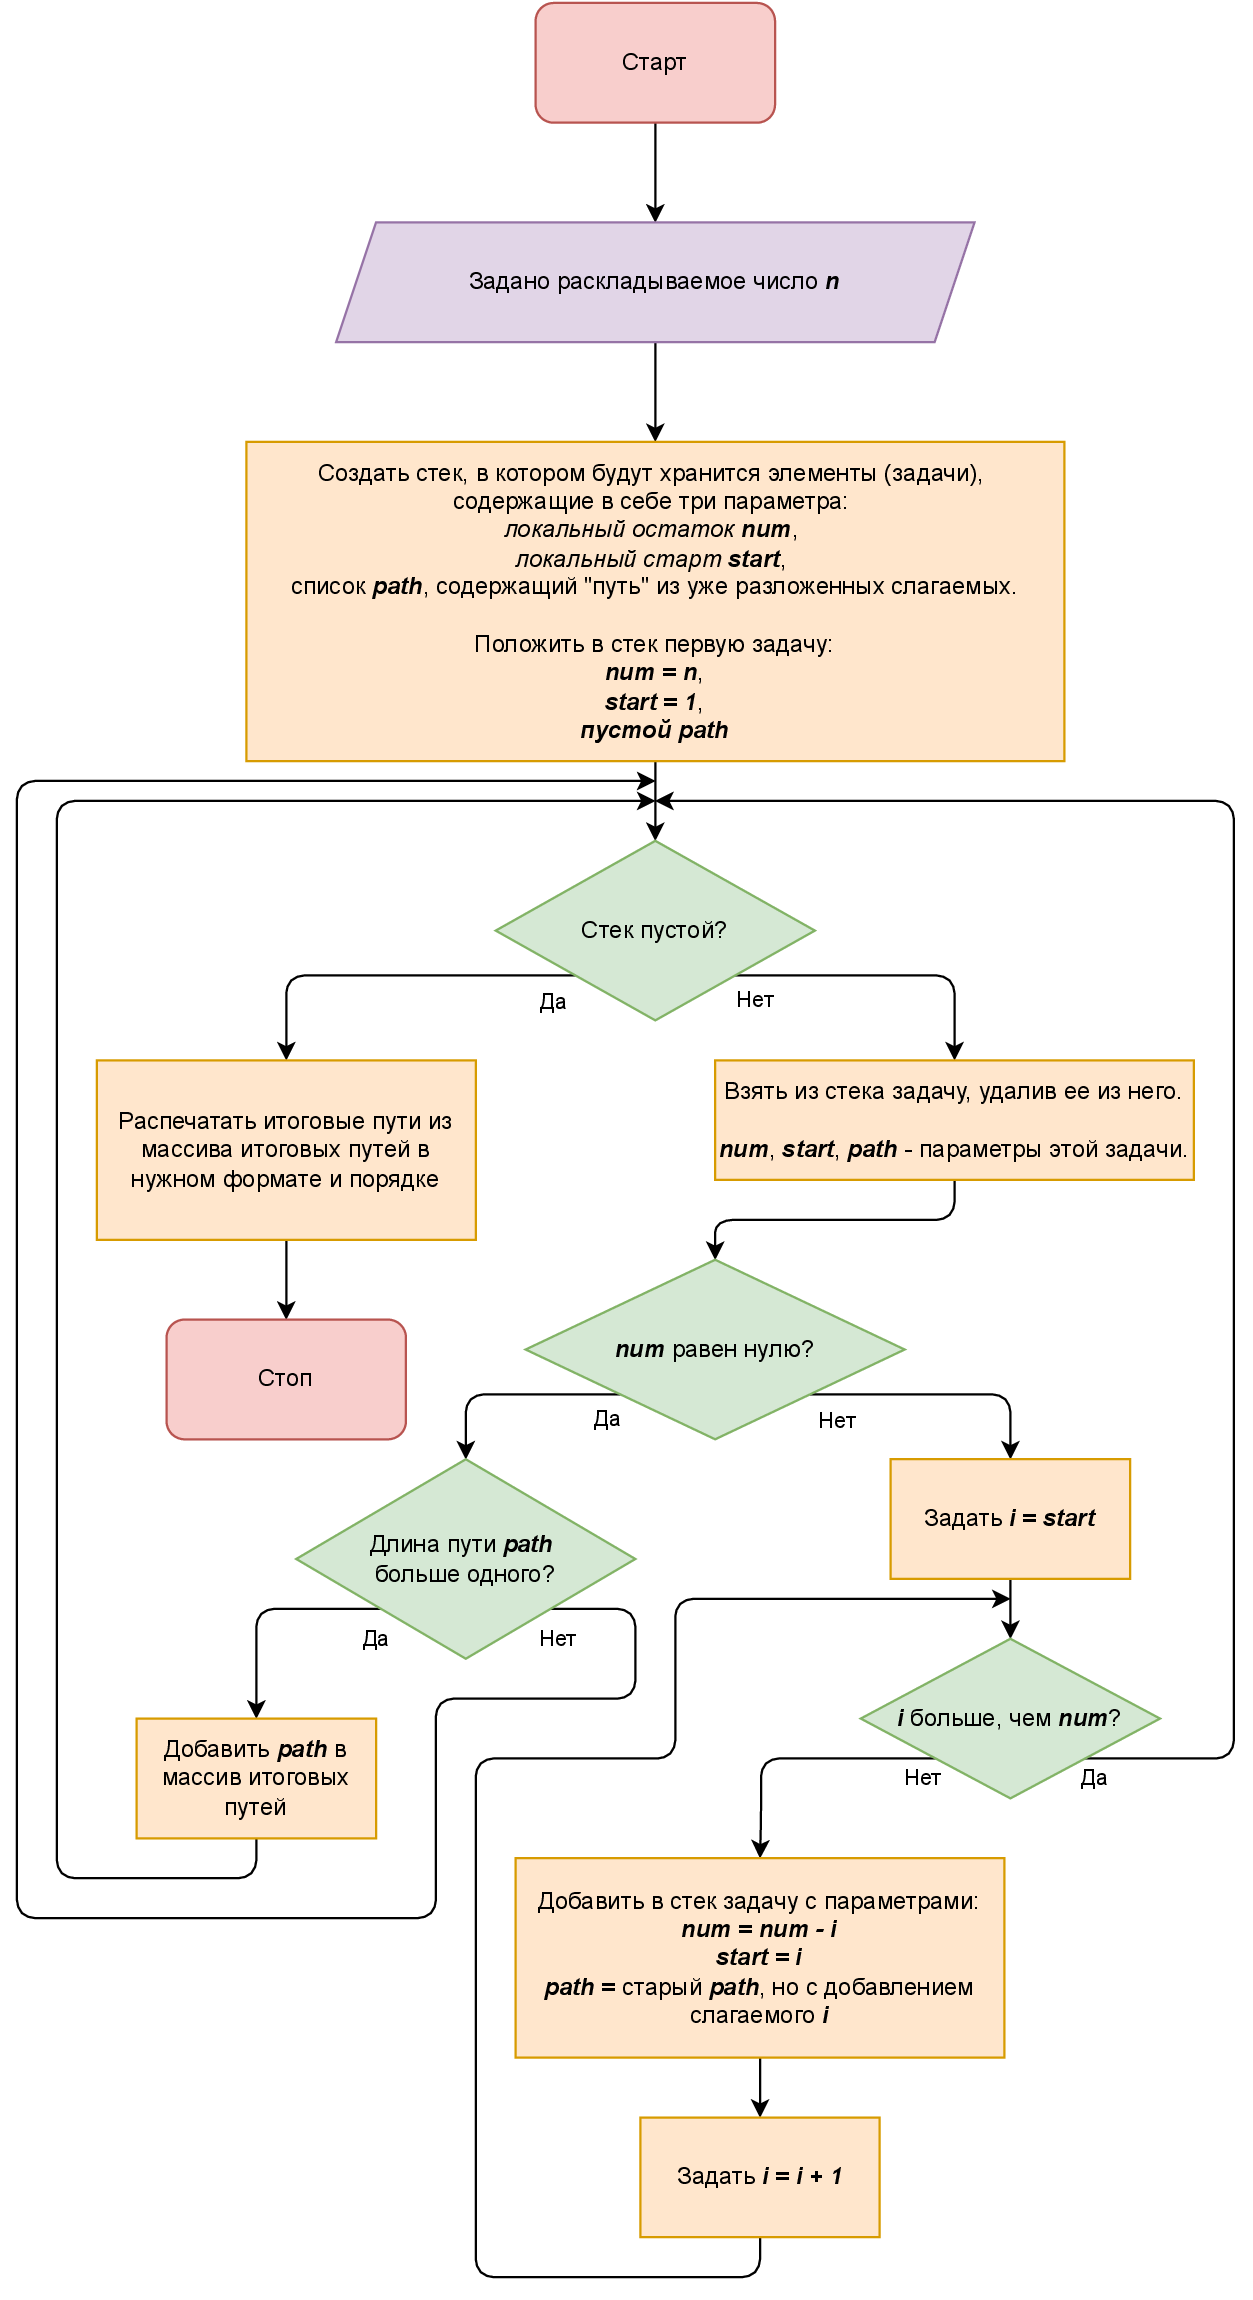

In [84]:
from wand.image import Image as WImage
blockscheme = WImage(filename='img/iterative_blockscheme.pdf',
                     resolution=200)
blockscheme

## Сравнение производительности
**Задание 3.4.** *Сравните производительность реализованных алгоритмов (количество итераций (соответственно вызовов рекурсии) подбирайте исходя из условий задачи).*

In [76]:
def print_sum_decompositions_recursively_hidden(n, start=1, path=()):
    if n == 0:
        if len(path) > 1:
            pass
        return
    
    for i in range(start, n+1):
        print_sum_decompositions_recursively_hidden(n-i, i, (*path, i))

%time print_sum_decompositions_recursively_hidden(50)

CPU times: total: 250 ms
Wall time: 245 ms


In [82]:
def print_sum_decompositions_iteratively_hidden(n, reverse=False):
    stack = [(n, 1, [])]
    results = []
    while stack:
        num, start, path = stack.pop()
        if num == 0:
            if len(path) > 1:
                results.append(path)
        else:
            for i in range(start, num+1):
                stack.append((num-i, i, path+[i]))
    for path in results[::(int(reverse) - abs(1 - int(reverse)))]:
        pass

%time print_sum_decompositions_iteratively_hidden(50)

CPU times: total: 391 ms
Wall time: 399 ms


Итеративная реализация медленнее рекурсивной при $n$ = 50 на 60%.

Это может быть связано с наличием различных оптимизаций работы со стеком вызовов в Python, которые не работают при использовании "самодельного" стека задач, который выполняет похожую функцию в итеративной реализации.